In [1]:
##################################
### Import the usual libraries ###
##################################

#numpy
import numpy as np

# scipy
from scipy.stats import binned_statistic

#astropy
import astropy
from astropy.io import fits, ascii
from astropy.table import Table, Column, QTable

#matplotlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator
from matplotlib.offsetbox import AnchoredText

# Yumi's Code to convert (RA,DEC) to MS coordinates
import MagellanicStream as ms

# .py files for grad calc
import astrofunctions as astro
import lmcgeometry as lgeo
import mlefitting as mle
import utilities as util

# Ignore warnings unless crashes
import warnings
warnings.filterwarnings('ignore')

#progress bars
from tqdm import tqdm_notebook

In [2]:
# PARSEC Isochrones
parsecall = ascii.read('/Users/joshpovick/Research/LMC_Gradients_with_Ages/parsec3_3.dat', \
                    format='basic', delimiter='\s')

rgb = np.where(parsecall['label']==3)
parsec = parsecall[rgb]

# LMC lmc data
lmc = fits.getdata('lmc_rgbmembers.r13-l33-58672.fits.gz',1)
cln = np.where((lmc['FE_H']>-9999.0)&(lmc['AK_TARG']>-9999.0)&(lmc['LOGG']>0.0)&
                (lmc['M_H_ERR']>-90.0)&(lmc['C_FE']>-9999.0)&(lmc['N_FE']>-9999.0))

lmc = lmc[cln]

In [14]:
### All elements APOGEE measures abundances for
elems = ['M_H','C_FE','N_FE','O_FE','NA_FE','MG_FE','AL_FE','SI_FE','P_FE','S_FE','K_FE','CA_FE','TI_FE',
         'TIII_FE','V_FE','CR_FE','MN_FE','FE_H','CO_FE','NI_FE','CU_FE','GE_FE','RB_FE','CE_FE','ND_FE','YB_FE']

labs = ['[M/H]','[C/Fe]','[N/Fe]','[O/Fe]','[Na/Fe]','[Mg/Fe]','[Al/Fe]','[Si/Fe]','[P/Fe]','[S/Fe]','[K/Fe]',
        '[Ca/Fe','[Ti/FE]','[Ti II/Fe]','[V/Fe]','[Cr/Fe]','[Mn/Fe]','[Fe/H]','[Co/Fe]','[Ni/Fe]','[Cu/Fe]',
        '[Ge/Fe]','[Rb/Fe]','[Ce/Fe]','[Nd/Fe]','[Yb/FE]']

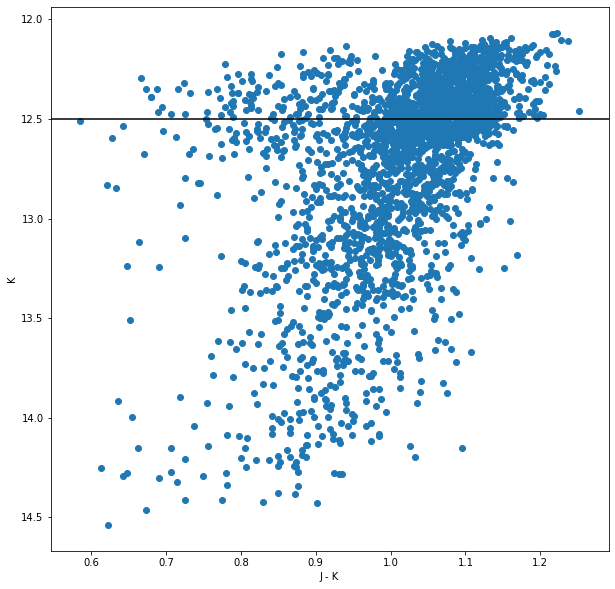

In [5]:
plt.figure(figsize=[10,10])
plt.scatter((lmc['J']-lmc['K']),lmc['K'],cmap='jet',vmin=min(lmc['K']))
plt.axhline(12.5,c='k')

plt.gca().invert_yaxis()

plt.xlabel(r'J - K')
plt.ylabel(r'K')

plt.show()

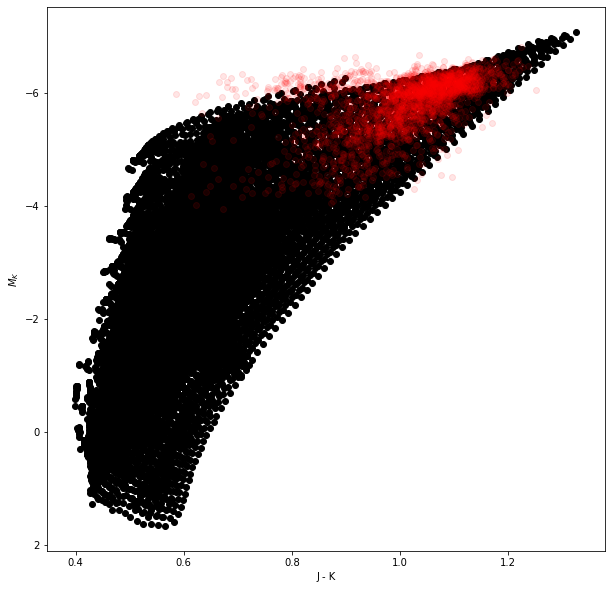

In [103]:
absk = astro.absmag(lmc['K'],dist) - lmc['AK_TARG']

agb = np.where(parsecall['label']==7)

plt.figure(figsize=[10,10])
plt.scatter(parsec['Jmag']-parsec['Ksmag'],parsec['Ksmag'],c='k')
# plt.scatter((parsecall['Jmag']-parsecall['Ksmag'])[agb],parsecall['Ksmag'][agb],c='blue')
plt.scatter((lmc['J']-lmc['K']),absk,c='r',vmin=min(lmc['K']),alpha=0.1)
# plt.axhline(12.5,c='k')

plt.gca().invert_yaxis()

plt.xlabel(r'J - K')
plt.ylabel(r'$M_K$')

plt.show()

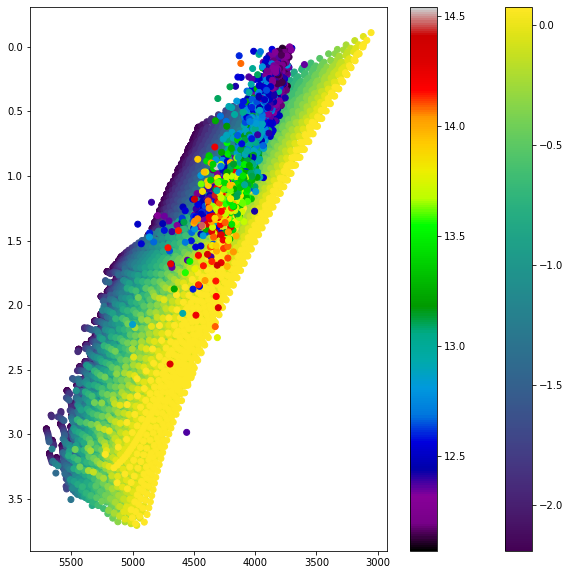

In [57]:
plt.figure(figsize=[10,10])
plt.scatter(10**parsec['logTe'],parsec['logg'],c=parsec['MH'])
plt.colorbar()
# plt.scatter((parsecall['Jmag']-parsecall['Ksmag'])[agb],parsecall['Ksmag'][agb],c='blue')
plt.scatter(lmc['TEFF'],lmc['logg'],c=lmc['K'],vmin=min(lmc['K']),cmap='nipy_spectral')
plt.colorbar()
# plt.axhline(12.5,c='k')

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

# plt.xlabel(r'J - K')
# plt.ylabel(r'$M_K$')

plt.show()

In [85]:
-1.115

# np.unique(parsec['MH'])

-1.115

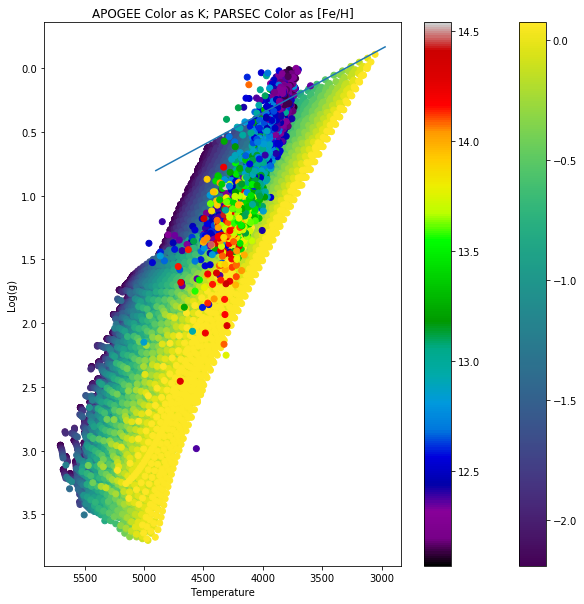

In [142]:
left = parsec[np.where(parsec['MH']==min(parsec['MH']))]
middle = parsec[np.where(parsec['MH']==-1.115)]
right = parsec[np.where(parsec['MH']==max(parsec['MH']))]

gravs = [min(left['logg'])-0.03,min(middle['logg']),min(right['logg'])-0.015]

teffs = [max(10**left[np.where(left['logg']==min(left['logg']))]['logTe']),
         min(10**middle[np.where(middle['logg']==min(middle['logg']))]['logTe']),
         min(10**right[np.where(right['logg']==min(right['logg']))]['logTe'])]

z = np.polyfit(teffs, gravs, 3)
p = np.poly1d(z)

plt.figure(figsize=[10,10])
plt.scatter(10**parsec['logTe'],parsec['logg'],c=parsec['MH'])
plt.colorbar()
# plt.scatter(10**parsecall[agb]['logTe'],parsecall['logg'][agb],c=parsecall['MH'][agb])
plt.scatter(lmc['TEFF'],lmc['logg'],c=lmc['K'],vmin=min(lmc['K']),cmap='nipy_spectral')
plt.colorbar()

plt.plot([2970,4900],[p(2970),p(4900)])
# plt.axhline(12.5,c='k')

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

plt.xlabel(r'Temperature')
plt.ylabel(r'Log(g)')
plt.title(r'APOGEE Color as K; PARSEC Color as [Fe/H]')

plt.show()

In [145]:
agb_cut = np.where(lmc['LOGG']>p(lmc['TEFF']))

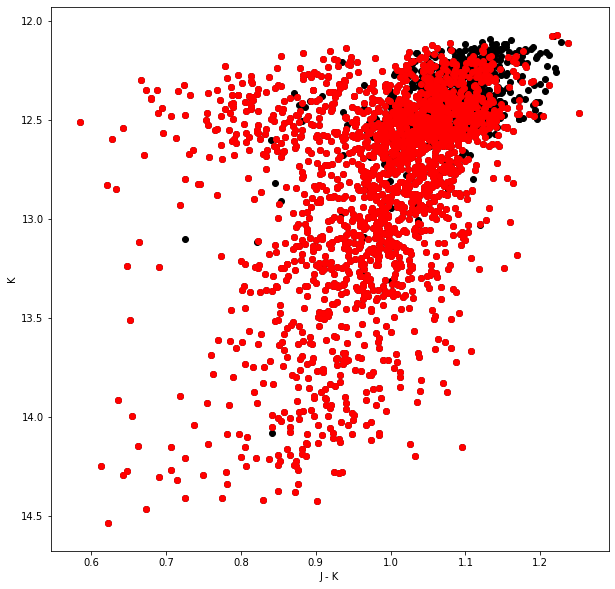

In [139]:
plt.figure(figsize=[10,10])
plt.scatter((lmc['J']-lmc['K']),lmc['K'],c='k')
plt.scatter((lmc['J']-lmc['K'])[agb_cut],lmc['K'][agb_cut],c='r')
# plt.axhline(12.5,c='k')

plt.gca().invert_yaxis()

plt.xlabel(r'J - K')
plt.ylabel(r'K')

plt.show()

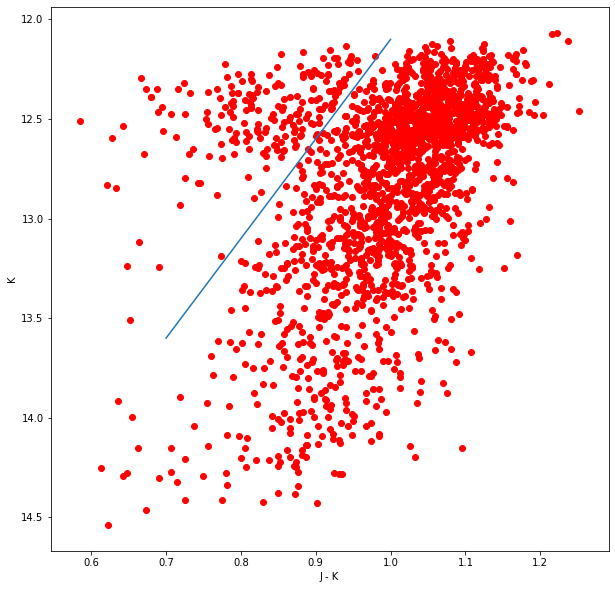

In [154]:
kmags = [0.7,1.]
colos = [13.5,12.]

z = np.polyfit(kmags, colos, 1)
bl = np.poly1d(z)

plt.figure(figsize=[10,10])
# plt.scatter((lmc['J']-lmc['K']),lmc['K'],c='k')
plt.scatter((lmc['J']-lmc['K'])[agb_cut],lmc['K'][agb_cut],c='r')
plt.plot([0.7,1.],[bl(0.7)+0.1,bl(1.)+0.1])
# plt.axhline(12.5,c='k')

plt.gca().invert_yaxis()

plt.xlabel(r'J - K')
plt.ylabel(r'K')

plt.show()

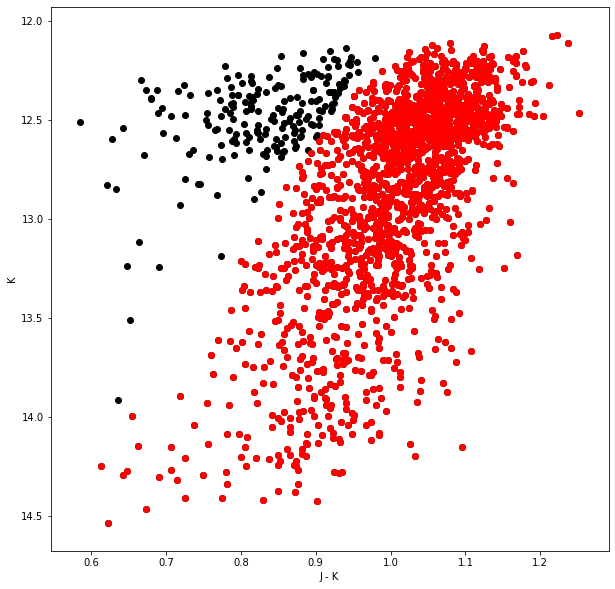

In [157]:
lmc_noagb = lmc[agb_cut]
bloop_cut = np.where(lmc_noagb['K']>bl(lmc_noagb['J']-lmc_noagb['K'])+0.1)
lmc_nobloop_noagb = lmc_noagb[bloop_cut]

plt.figure(figsize=[10,10])
plt.scatter((lmc_noagb['J']-lmc_noagb['K']),lmc_noagb['K'],c='k')
plt.scatter((lmc_nobloop_noagb['J']-lmc_nobloop_noagb['K']),lmc_nobloop_noagb['K'],c='r')

plt.gca().invert_yaxis()

plt.xlabel(r'J - K')
plt.ylabel(r'K')

plt.show()

<font size='45'>
    <b>
        Maximum Likelihood Estimation
    </b>
</font>

In [169]:
### Radii LMC
x,y,dist = lgeo.LMCdisk_cart(lmc_nobloop_noagb['RA'],lmc_nobloop_noagb['DEC'])
radius = lgeo.elliptical_radius(x,y)

In [170]:
##############################
### Fit Overall Trendlines ###
##############################

med_ms = []
med_bs = []

### Initial fit
for i in range(len(elems)-5):
    
    # clean up data
    cln = np.where((lmc_nobloop_noagb[elems[i]]>-100)&(lmc_nobloop_noagb['SNR']>=100))
    
    # fit data
    try:
        slope, inter = mle.mle_fit(radius[cln],lmc_nobloop_noagb[elems[i]][cln],
                                   lmc_nobloop_noagb[elems_err[i]][cln])
        med_ms.append(slope)
        med_bs.append(inter)
    
    except:
        med_ms.append(-9999.)
        med_bs.append(-9999.)
        
for i in range(len(med_ms)):
    print('{}: slope: {:.4f}; inter: {:.4f}'.format(labs[i],med_ms[i],med_bs[i]))


[M/H]: slope: -0.0488; inter: -0.5311
[C/Fe]: slope: -0.0231; inter: -0.2493
[N/Fe]: slope: -0.0168; inter: 0.1725
[O/Fe]: slope: -0.0008; inter: 0.0455
[Na/Fe]: slope: -0.0053; inter: -0.1786
[Mg/Fe]: slope: 0.0041; inter: 0.1010
[Al/Fe]: slope: -0.0155; inter: -0.2845
[Si/Fe]: slope: 0.0048; inter: -0.0063
[P/Fe]: slope: 0.0264; inter: 0.0329
[S/Fe]: slope: 0.0252; inter: 0.1297
[K/Fe]: slope: 0.0234; inter: -0.0809
[Ca/Fe: slope: -0.0026; inter: 0.1107
[Ti/FE]: slope: -0.0055; inter: -0.0987
[Ti II/Fe]: slope: 0.2467; inter: -0.2934
[V/Fe]: slope: -0.0062; inter: -0.0865
[Cr/Fe]: slope: -0.0061; inter: 0.0638
[Mn/Fe]: slope: -0.0427; inter: -0.0005
[Fe/H]: slope: -0.0471; inter: -0.5302
[Co/Fe]: slope: -0.0088; inter: -0.1059
[Ni/Fe]: slope: -0.0027; inter: -0.1168
[Cu/Fe]: slope: 0.0840; inter: -0.0458


In [171]:
matplotlib.rcParams.update({'font.size': 18})
med_elems_dist = []
for i in range(len(elems)-5):
    
    def trendline(x):
        return med_ms[i]*x+med_bs[i]
    
    cln = np.where((lmc_nobloop_noagb[elems[i]]>-100)&(lmc_nobloop_noagb['SNR']>=100))
    plug = trendline(radius[cln])
    dist = plug-lmc_nobloop_noagb[elems[i]][cln]
    
    try:
        med_elems_dist.append(dist)    
    
        bins = np.append(np.arange(np.floor(np.min(radius[cln])),np.ceil(np.max(radius[cln])),1.0),
                     np.ceil(np.max(radius[cln]))+1) 
        bin_dist, _, _ = binned_statistic(radius[cln],dist,statistic='median',bins=bins)
        bin_spr, _, _ = binned_statistic(radius[cln],dist,
                                         statistic=lambda y: np.median(np.absolute(y-np.median(y))),bins=bins)
    except:
        med_elems_dist.append(-9999.0*np.ones(len(bins)))

In [172]:
#################################
### Remove Outliers and Refit ###
#################################

med_m_devs = []
med_b_devs = []
re_med_ms = []
re_med_bs = []

prune_fact = 3.
for i in tqdm_notebook(range(len(elems)-5),desc='Done?'):
    
    # clean up data and prune outliers
    cln = np.where((lmc_nobloop_noagb[elems[i]]>-100)&(lmc_nobloop_noagb['SNR']>=100))
    prune = np.where((lmc_nobloop_noagb[elems[i]]>-prune_fact*util.mad(med_elems_dist[i])+
                      np.median(lmc_nobloop_noagb[cln][elems[i]]))&
                     (lmc_nobloop_noagb[elems[i]]<prune_fact*util.mad(med_elems_dist[i])+
                      np.median(lmc_nobloop_noagb[cln][elems[i]])))

    exog = radius[prune]
    endog = lmc_nobloop_noagb[elems[i]][prune]
    endog_err = lmc_nobloop_noagb[elems_err[i]][prune]
    
    slps = []
    ints = []
    
    # resample with replacement 100 times and fit lines
    for j in tqdm_notebook(range(1000),leave=False,desc='Iteration'):
        
        ind = np.floor(np.random.random(len(endog))*(len(endog)-1)).astype(int)
        indexog = exog[ind]
        indendog = endog[ind]
        indendog_err = endog_err[ind]
        
        # fit sampled data
        try:
            sample_slope, sample_inter = mle.mle_fit(indexog,indendog,indendog_err)
            slps.append(sample_slope)
            ints.append(sample_inter)
        
        except:
            slps.append(-9999.0)
            ints.append(-9999.0)
        
    med_m_devs.append(util.mad(slps))
    med_b_devs.append(util.mad(ints))
    
    re_med_ms.append(np.median(slps))
    re_med_bs.append(np.median(ints))
    
for i in range(len(re_med_ms)):
    print('{}: slope: {:.4f} +/- {:.4f} inter: {:.4f} +/- {:.4f}'.format(elems[i],re_med_ms[i],med_m_devs[i],
                                                                         re_med_bs[i],med_b_devs[i]))


M_H: slope: -0.0264 +/- 0.0039 inter: -0.5783 +/- 0.0136
C_FE: slope: -0.0201 +/- 0.0016 inter: -0.2465 +/- 0.0049
N_FE: slope: -0.0121 +/- 0.0014 inter: 0.1347 +/- 0.0056
O_FE: slope: -0.0027 +/- 0.0011 inter: 0.0528 +/- 0.0025
NA_FE: slope: 0.0030 +/- 0.0035 inter: -0.1897 +/- 0.0113
MG_FE: slope: -0.0002 +/- 0.0018 inter: 0.1161 +/- 0.0060
AL_FE: slope: -0.0125 +/- 0.0029 inter: -0.2929 +/- 0.0116
SI_FE: slope: 0.0038 +/- 0.0015 inter: 0.0055 +/- 0.0054
P_FE: slope: 0.0287 +/- 0.0055 inter: 0.0189 +/- 0.0189
S_FE: slope: 0.0111 +/- 0.0039 inter: 0.1608 +/- 0.0135
K_FE: slope: 0.0422 +/- 0.0309 inter: -0.0749 +/- 0.0096
CA_FE: slope: -0.0028 +/- 0.0007 inter: 0.1117 +/- 0.0022
TI_FE: slope: -9999.0000 +/- 0.0000 inter: -9999.0000 +/- 0.0000
TIII_FE: slope: 0.1865 +/- 0.0658 inter: -0.2934 +/- 0.0222
V_FE: slope: -0.0076 +/- 0.0021 inter: -0.0709 +/- 0.0077
CR_FE: slope: -0.0082 +/- 0.0022 inter: 0.0737 +/- 0.0070
MN_FE: slope: nan +/- nan inter: 0.0053 +/- 0.0102
FE_H: slope: -0.022

<font size='20'>
    <b>
        Age Binning
    </b>
</font>

In [173]:
#####################
### Make Age Bins ###
#####################

ages = fits.getdata('TEST_pca_ols_ages.fits')[agb_cut][bloop_cut]

young = np.where(ages['AGE']<=np.log10(0.5*10**9))
yless = np.where((ages['AGE']>np.log10(0.5*10**9))&(ages['AGE']<=np.log10(2.0*10**9)))
ymed = np.where((ages['AGE']>np.log10(2.0*10**9))&(ages['AGE']<=np.log10(7*10**9)))
omed = np.where((ages['AGE']>np.log10(7*10**9))&(ages['AGE']<=np.log10(10.5*10**9)))
old = np.where(ages['AGE']>np.log10(10.5*10**9))

lmcyoung = lmc_nobloop_noagb[young]
lmcyless = lmc_nobloop_noagb[yless]
lmcymed = lmc_nobloop_noagb[ymed]
lmcomed = lmc_nobloop_noagb[omed]
lmcold = lmc_nobloop_noagb[old]

In [174]:
##################################
### Age bin initial Trendlines ###
##################################

### young

young_ms = []
young_bs = []

# lmcyoung = lmc_nobloop_noagb[young]

### Initial fit
for i in range(len(elems)-5):
    
    # clean up data
    cln = np.where((lmcyoung[elems[i]]>-100))
    
    try:
        # fit data
        slope, inter = mle.mle_fit(radius[young][cln],lmcyoung[elems[i]][cln],lmcyoung[elems_err[i]][cln])
        young_ms.append(slope)
        young_bs.append(inter)
        
    except:
        young_ms.append(-9999.0)
        young_bs.append(-9999.0)
    
### yless

yless_ms = []
yless_bs = []

# lmcyless = lmc_nobloop_noagb[yless]

### Initial fit
for i in range(len(elems)-5):
    
    # clean up data
    cln = np.where((lmcyless[elems[i]]>-100))
    
    try:
        # fit data
        slope, inter = mle.mle_fit(radius[yless][cln],lmcyless[elems[i]][cln],lmcyless[elems_err[i]][cln])
        yless_ms.append(slope)
        yless_bs.append(inter)
        
    except:
        yless_ms.append(-9999.0)
        yless_bs.append(-9999.0)
    
### ymed

ymed_ms = []
ymed_bs = []

# lmcymed = lmc_nobloop_noagb[ymed]

### Initial fit
for i in range(len(elems)-5):
    
    # clean up data
    cln = np.where((lmcymed[elems[i]]>-100))
    
    try:
        # fit data
        slope, inter = mle.mle_fit(radius[ymed][cln],lmcymed[elems[i]][cln],lmcymed[elems_err[i]][cln])
        ymed_ms.append(slope)
        ymed_bs.append(inter)
        
    except:
        ymed_ms.append(-9999.0)
        ymed_bs.append(-9999.0)
    
### omed

omed_ms = []
omed_bs = []

# lmcomed = lmc_nobloop_noagb[omed]

### Initial fit
for i in range(len(elems)-5):
    
    # clean up data
    cln = np.where((lmcomed[elems[i]]>-100))
    
    try:
        # fit data
        slope, inter = mle.mle_fit(radius[omed][cln],lmcomed[elems[i]][cln],lmcomed[elems_err[i]][cln])
        omed_ms.append(slope)
        omed_bs.append(inter)
        
    except:
        omed_ms.append(-9999.0)
        omed_bs.append(-9999.0)
    
### old

old_ms = []
old_bs = []

# lmcold = lmc_nobloop_noagb[old]

### Initial fit
for i in range(len(elems)-5):
    
    # clean up data
    cln = np.where((lmcold[elems[i]]>-100))
    
    try:
        # fit data
        slope, inter = mle.mle_fit(radius[old][cln],lmcold[elems[i]][cln],lmcold[elems_err[i]][cln])
        old_ms.append(slope)
        old_bs.append(inter)
        
    except:
        old_ms.append(-9999.0)
        old_bs.append(-9999.0)

In [175]:
############################################
### Find distances between data and fits ###
############################################

young_dist = []
for i in range(len(elems)-5):
    
    def trendline(x):
        return young_ms[i]*x+young_bs[i]
    
    cln = np.where((lmcyoung[elems[i]]>-100))
    plug = trendline(radius[young][cln])
    dist = plug-lmcyoung[elems[i]][cln]
    
    young_dist.append(dist) 
    
yless_dist = []
for i in range(len(elems)-5):
    
    def trendline(x):
        return yless_ms[i]*x+yless_bs[i]
    
    cln = np.where((lmcyless[elems[i]]>-100))
    plug = trendline(radius[yless][cln])
    dist = plug-lmcyless[elems[i]][cln]
    
    yless_dist.append(dist) 
    
ymed_dist = []
for i in range(len(elems)-5):
    
    def trendline(x):
        return ymed_ms[i]*x+ymed_bs[i]
    
    cln = np.where((lmcymed[elems[i]]>-100))
    plug = trendline(radius[ymed][cln])
    dist = plug-lmcymed[elems[i]][cln]
    
    ymed_dist.append(dist) 
    
omed_dist = []
for i in range(len(elems)-5):
    
    def trendline(x):
        return omed_ms[i]*x+omed_bs[i]
    
    cln = np.where((lmcomed[elems[i]]>-100))
    plug = trendline(radius[omed][cln])
    dist = plug-lmcomed[elems[i]][cln]
    
    omed_dist.append(dist) 
    
old_dist = []
for i in range(len(elems)-5):
    
    def trendline(x):
        return old_ms[i]*x+old_bs[i]
    
    cln = np.where((lmcold[elems[i]]>-100))
    plug = trendline(radius[old][cln])
    dist = plug-lmcold[elems[i]][cln]
    
    old_dist.append(dist)

In [176]:
###################
### Prune Refit ###
###################

prune_fact = 3.0

re_young_ms = []
re_young_bs = []
young_m_devs = []
young_b_devs = []

for i in tqdm_notebook(range(len(elems)-5),desc='Done?'):
    
    # clean up data and prune outliers
    cln = np.where((lmcyoung[elems[i]]>-100))
    prune = np.where((lmcyoung[elems[i]]>-prune_fact*util.mad(young_dist[i])+
                      np.median(lmcyoung[cln][elems[i]]))&
                     (lmcyoung[elems[i]]<prune_fact*util.mad(young_dist[i])+
                      np.median(lmcyoung[cln][elems[i]])))

    exog = radius[young][prune]
    endog = lmcyoung[elems[i]][prune]
    endog_err = lmcyoung[elems_err[i]][prune]
    
    slps = []
    ints = []
    
    # resample with replacement 1000 times and fit lines
    for j in tqdm_notebook(range(1000),leave=False,desc='Iteration'):
        
        ind = np.floor(np.random.random(len(endog))*(len(endog)-1)).astype(int)
        indexog = exog[ind]
        indendog = endog[ind]
        indendog_err = endog_err[ind]
        
        # fit sampled data
        try:
            sample_slope, sample_inter = mle.mle_fit(indexog,indendog,indendog_err)
            slps.append(sample_slope)
            ints.append(sample_inter)
        
        except:
            slps.append(-9999.0)
            ints.append(-9999.0)
        
    young_m_devs.append(util.mad(slps))
    young_b_devs.append(util.mad(ints))
    re_young_ms.append(np.median(slps))
    re_young_bs.append(np.median(ints))

re_yless_ms = []
re_yless_bs = []
yless_m_devs = []
yless_b_devs = []

for i in tqdm_notebook(range(len(elems)-5),desc='Done?'):
    
    # clean up data and prune outliers
    cln = np.where((lmcyless[elems[i]]>-100))
    prune = np.where((lmcyless[elems[i]]>-prune_fact*util.mad(yless_dist[i])+
                      np.median(lmcyless[cln][elems[i]]))&
                     (lmcyless[elems[i]]<prune_fact*util.mad(yless_dist[i])+
                      np.median(lmcyless[cln][elems[i]])))

    exog = radius[yless][prune]
    endog = lmcyless[elems[i]][prune]
    endog_err = lmcyless[elems_err[i]][prune]
    
    slps = []
    ints = []
    
    # resample with replacement 1000 times and fit lines
    for j in tqdm_notebook(range(1000),leave=False,desc='Iteration'):
        
        ind = np.floor(np.random.random(len(endog))*(len(endog)-1)).astype(int)
        indexog = exog[ind]
        indendog = endog[ind]
        indendog_err = endog_err[ind]
        
        # fit sampled data
        try:
            sample_slope, sample_inter = mle.mle_fit(indexog,indendog,indendog_err)
            slps.append(sample_slope)
            ints.append(sample_inter)
        
        except:
            slps.append(-9999.0)
            ints.append(-9999.0)
        
    yless_m_devs.append(util.mad(slps))
    yless_b_devs.append(util.mad(ints))
    re_yless_ms.append(np.median(slps))
    re_yless_bs.append(np.median(ints))

re_ymed_ms = []
re_ymed_bs = []
ymed_m_devs = []
ymed_b_devs = []

for i in tqdm_notebook(range(len(elems)-5),desc='Done?'):
    
    # clean up data and prune outliers
    cln = np.where((lmcymed[elems[i]]>-100))
    prune = np.where((lmcymed[elems[i]]>-prune_fact*util.mad(ymed_dist[i])+
                      np.median(lmcymed[cln][elems[i]]))&
                     (lmcymed[elems[i]]<prune_fact*util.mad(ymed_dist[i])+
                      np.median(lmcymed[cln][elems[i]])))

    exog = radius[ymed][prune]
    endog = lmcymed[elems[i]][prune]
    endog_err = lmcymed[elems_err[i]][prune]
    
    slps = []
    ints = []
    
    # resample with replacement 1000 times and fit lines
    for j in tqdm_notebook(range(1000),leave=False,desc='Iteration'):
        
        ind = np.floor(np.random.random(len(endog))*(len(endog)-1)).astype(int)
        indexog = exog[ind]
        indendog = endog[ind]
        indendog_err = endog_err[ind]
        
        # fit sampled data
        try:
            sample_slope, sample_inter = mle.mle_fit(indexog,indendog,indendog_err)
            slps.append(sample_slope)
            ints.append(sample_inter)
        
        except:
            slps.append(-9999.0)
            ints.append(-9999.0)
        
    ymed_m_devs.append(util.mad(slps))
    ymed_b_devs.append(util.mad(ints))
    re_ymed_ms.append(np.median(slps))
    re_ymed_bs.append(np.median(ints))

re_omed_ms = []
re_omed_bs = []
omed_m_devs = []
omed_b_devs = []

for i in tqdm_notebook(range(len(elems)-5),desc='Done?'):
    
    # clean up data and prune outliers
    cln = np.where((lmcomed[elems[i]]>-100))
    prune = np.where((lmcomed[elems[i]]>-prune_fact*util.mad(omed_dist[i])+
                      np.median(lmcomed[cln][elems[i]]))&
                     (lmcomed[elems[i]]<prune_fact*util.mad(omed_dist[i])+
                      np.median(lmcomed[cln][elems[i]])))

    exog = radius[omed][prune]
    endog = lmcomed[elems[i]][prune]
    endog_err = lmcomed[elems_err[i]][prune]
    
    slps = []
    ints = []
    
    # resample with replacement 1000 times and fit lines
    for j in tqdm_notebook(range(1000),leave=False,desc='Iteration'):
        
        ind = np.floor(np.random.random(len(endog))*(len(endog)-1)).astype(int)
        indexog = exog[ind]
        indendog = endog[ind]
        indendog_err = endog_err[ind]
        
        # fit sampled data
        try:
            sample_slope, sample_inter = mle.mle_fit(indexog,indendog,indendog_err)
            slps.append(sample_slope)
            ints.append(sample_inter)
        
        except:
            slps.append(-9999.0)
            ints.append(-9999.0)
        
    omed_m_devs.append(util.mad(slps))
    omed_b_devs.append(util.mad(ints))
    re_omed_ms.append(np.median(slps))
    re_omed_bs.append(np.median(ints))
    
re_old_ms = []
re_old_bs = []
old_m_devs = []
old_b_devs = []

for i in tqdm_notebook(range(len(elems)-5),desc='Done?'):
    
    # clean up data and prune outliers
    cln = np.where((lmcold[elems[i]]>-100))
    prune = np.where((lmcold[elems[i]]>-prune_fact*util.mad(old_dist[i])+
                      np.median(lmcold[cln][elems[i]]))&
                     (lmcold[elems[i]]<prune_fact*util.mad(old_dist[i])+
                      np.median(lmcold[cln][elems[i]])))

    exog = radius[old][prune]
    endog = lmcold[elems[i]][prune]
    endog_err = lmcold[elems_err[i]][prune]
    
    slps = []
    ints = []
    
    # resample with replacement 1000 times and fit lines
    for j in tqdm_notebook(range(1000),leave=False,desc='Iteration'):
        
        ind = np.floor(np.random.random(len(endog))*(len(endog)-1)).astype(int)
        indexog = exog[ind]
        indendog = endog[ind]
        indendog_err = endog_err[ind]
        
        # fit sampled data
        try:
            sample_slope, sample_inter = mle.mle_fit(indexog,indendog,indendog_err)
            slps.append(sample_slope)
            ints.append(sample_inter)
        
        except:
            slps.append(-9999.0)
            ints.append(-9999.0)
        
    old_m_devs.append(util.mad(slps))
    old_b_devs.append(util.mad(ints))
    re_old_ms.append(np.median(slps))
    re_old_bs.append(np.median(ints))

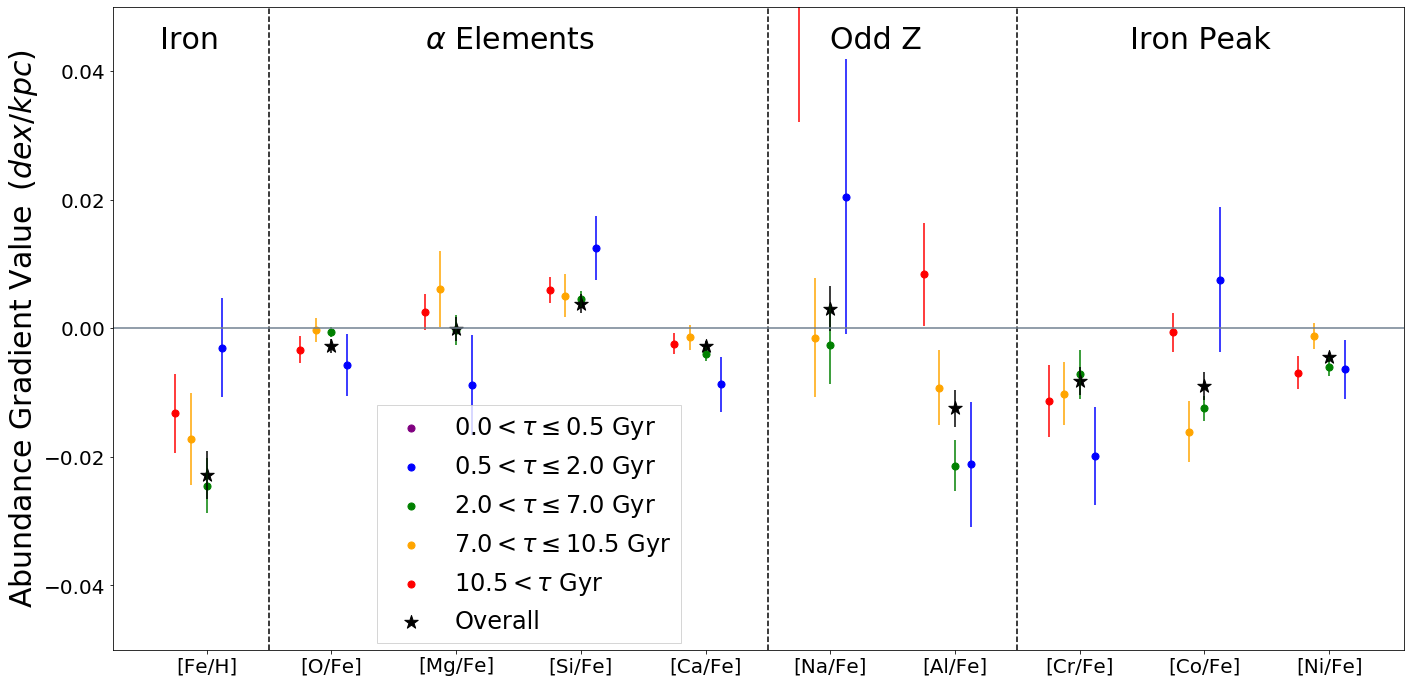

In [177]:
####################
### Summary plot ###
####################

# elements: O, Na, Mg, Al, Si, Ca, Cr, Fe, Co, Ni, V

idx = [np.squeeze(np.where(np.asarray(elems)=='FE_H')),np.squeeze(np.where(np.asarray(elems)=='O_FE')),
       np.squeeze(np.where(np.asarray(elems)=='MG_FE')),np.squeeze(np.where(np.asarray(elems)=='SI_FE')),
       np.squeeze(np.where(np.asarray(elems)=='CA_FE')),np.squeeze(np.where(np.asarray(elems)=='NA_FE')),
       np.squeeze(np.where(np.asarray(elems)=='AL_FE')),np.squeeze(np.where(np.asarray(elems)=='CR_FE')),
       np.squeeze(np.where(np.asarray(elems)=='CO_FE')),np.squeeze(np.where(np.asarray(elems)=='NI_FE'))]#,
       #np.squeeze(np.where(np.asarray(elems)=='V_FE'))]

good_young = []
good_yless = []
good_ymed = []
good_omed = []
good_old = []
good_over = []

err_young = []
err_yless = []
err_ymed = []
err_omed = []
err_old = []
err_over = []

for i in idx:
    good_young.append(re_young_ms[i])
    good_yless.append(re_yless_ms[i])
    good_ymed.append(re_ymed_ms[i])
    good_omed.append(re_omed_ms[i])
    good_old.append(re_old_ms[i])
    good_over.append(re_med_ms[i])
    
    err_young.append(young_m_devs[i])
    err_yless.append(yless_m_devs[i])
    err_ymed.append(ymed_m_devs[i])
    err_omed.append(omed_m_devs[i])
    err_old.append(old_m_devs[i])
    err_over.append(med_m_devs[i])

matplotlib.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=[20,10])

plt.scatter(np.add(np.arange(10),0.25),good_young,c='purple',label='$0.0 < \\tau \leq 0.5$ Gyr',s=50)
plt.errorbar(np.add(np.arange(10),0.25),good_young,yerr=err_young,c='purple',ls='none')

plt.scatter(np.add(np.arange(10),0.125),good_yless,c='blue',label='$0.5 < \\tau \leq 2.0$ Gyr',s=50)
plt.errorbar(np.add(np.arange(10),0.125),good_yless,yerr=err_yless,c='blue',ls='none')

plt.scatter([0,1,2,3,4,5,6,7,8,9],good_ymed,c='green',label='$2.0 < \\tau \leq 7.0$ Gyr',s=50)
plt.errorbar([0,1,2,3,4,5,6,7,8,9],good_ymed,yerr=err_ymed,c='green',ls='none')

plt.scatter(np.subtract(np.arange(10),0.125),good_omed,c='orange',label='$7.0 < \\tau \leq 10.5$ Gyr',s=50)
plt.errorbar(np.subtract(np.arange(10),0.125),good_omed,yerr=err_omed,c='orange',ls='none')

plt.scatter(np.subtract(np.arange(10),0.25),good_old,c='red',label='$10.5 < \\tau $ Gyr',s=50)
plt.errorbar(np.subtract(np.arange(10),0.25),good_old,yerr=err_old,c='red',ls='none')

plt.scatter([0,1,2,3,4,5,6,7,8,9],good_over,marker='*',c='black',label='Overall',s=200)
plt.errorbar([0,1,2,3,4,5,6,7,8,9],good_over,yerr=err_over,c='black',ls='none')

xplotlab = ['[Fe/H]','[O/Fe]','[Mg/Fe]','[Si/Fe]','[Ca/Fe]','[Na/Fe]','[Al/Fe]','[Cr/Fe]','[Co/Fe]',
            '[Ni/Fe]']#,'[V/Fe]']

xplotpos = [0,1,2,3,4,5,6,7,8,9]#,10] 
plt.xticks(xplotpos,xplotlab)

plt.axvline(0.5,c='k',ls='--')
plt.axvline(4.5,c='k',ls='--')
plt.axvline(6.5,c='k',ls='--')
plt.axhline(0.0,c='slategrey',ls='-')
plt.ylabel('Abundance Gradient Value $\,(dex/kpc)$',fontsize=30)

# plt.gca().set_ylim(top=0.05)

plt.text(-0.375,0.0435,'Iron',fontsize=30)
plt.text(1.75,0.0435,'$\\alpha$ Elements',fontsize=30)
plt.text(5.0,0.0435,'Odd Z',fontsize=30)
plt.text(7.4,0.0435,'Iron Peak',fontsize=30)

# plt.ylim(bottom=-0.045)
plt.ylim(-0.05,0.05)

plt.legend(loc=(0.205,0.01),frameon=True,fancybox=False,fontsize='large')
plt.tight_layout()
# plt.savefig('gradientSummaryplot.pdf',bbox_inches='tight')
plt.show()